<a href="https://colab.research.google.com/github/parita2003/Tesla_Stock_price_prediction/blob/main/Using_Deep_learning_(Simple_RNN_and_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [1. Loading Data](#1) <br>
* [2.Spliting Data as Train and Validation](#2) <br>
* [3.Creating Train Dataset from Train split](#3) <br>
* [4.Normalization / Feature Scaling](#4) <br>
* [5.Creating X_train and y_train from Train data](#5) <br>
* [6.Creating Simple RNN model](#6) <br>
* [7.Evaluating Model](#7) <br>
* [8.Creating Test Dataset from Validation Data](#8) <br>
* [9.Evaluating with Validation Data](#9) <br>
* [10.Creating LSTM model](#10) <br>
* [11.Evaluating LSTM model](#11) <br>
* [12.Future price prediction](#12) <br>


<a id="1"></a>
## 1.Loading Data

In [43]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings



In [ ]:
data = pd.read_csv("TSLA.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


<a id="2"></a>
## 2.Spliting Data as Train and Validation

In [ ]:
length_data = len(data)
split_ratio = 0.7
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 2956
Train data length : 2069
Validation data lenth : 887


In [ ]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2010-06-29,3.800000
1,2010-06-30,5.158000
2,2010-07-01,5.000000
3,2010-07-02,4.600000
4,2010-07-06,4.000000
...,...,...
2064,2018-09-10,54.652000
2065,2018-09-11,55.894001
2066,2018-09-12,56.287998
2067,2018-09-13,57.604000


In [ ]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
2069,2018-09-17,58.007999
2070,2018-09-18,59.338001
2071,2018-09-19,56.102001
2072,2018-09-20,60.712002
2073,2018-09-21,59.540001
...,...,...
2951,2022-03-18,874.489990
2952,2022-03-21,914.979980
2953,2022-03-22,930.000000
2954,2022-03-23,979.940002


<a id="3"></a>
## 3.Creating Train Dataset from Train split

* We will get Open column as our dataset
* Dataset to be converted to array by adding `.values`

In [ ]:
dataset_train = train_data.Open.values
dataset_train.shape

(2069,)

In [ ]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(2069, 1)

#### <a id="4"></a>
## 4.Normalization / Feature Scaling

* Dataset values will be in between 0 and 1 after scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(2069, 1)

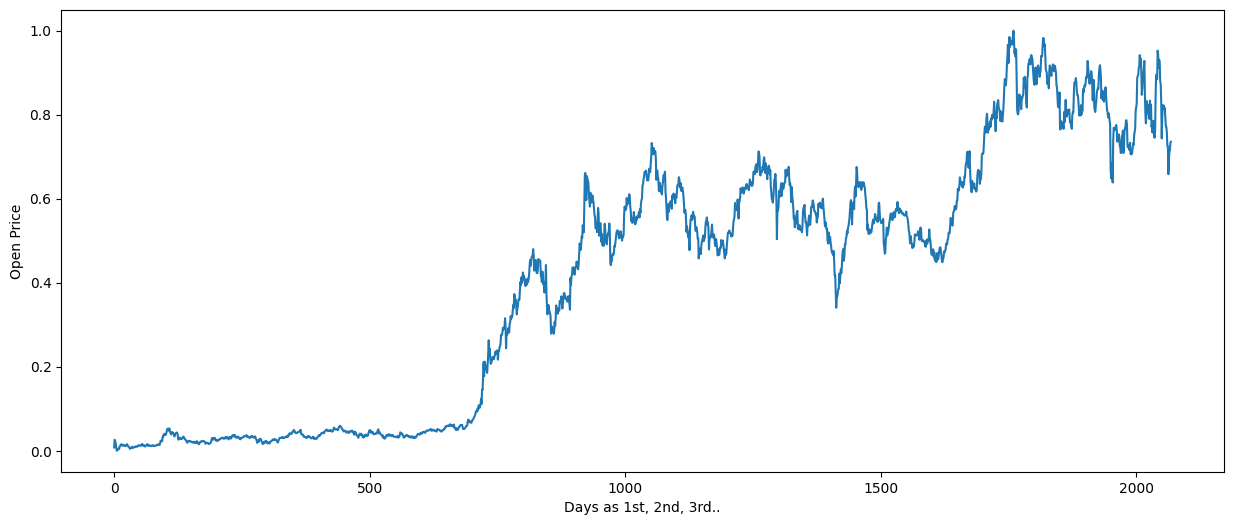

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

<a id="5"></a>
## 5.Creating X_train and y_train from Train data

![image.png](attachment:image.png)

* We have train data composed of stock open prices over days
* So, it has 1184 prices corresponding 1184 days
* My aim is to predict the open price of the next day.
* I can use a time step of 50 days.
* I will pick first 50 open prices (0 to 50), 1st 50 price will be in X_train data
* Then predict the price of 51th day; and 51th price will be in y_train data
* Again, i will pick prices from 1 to 51, those will be in X_train data
* Then predict the next days price, 52nd price will be in y_train data

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (2019, 50)
Shape of y_train before reshape : (2019,)


## Reshape

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (2019, 50, 1)
Shape of y_train after reshape : (2019, 1)


* Shape of X_train : 1134 x 50 x 1
* That means we have 1134 rows, each row has 50 rows and 1 column
* Lets check the first row: it has 50 rows (open prices of 49 days)

In [ ]:
X_train[0]

array([[0.00771826],
       [0.02604237],
       [0.0239104 ],
       [0.01851302],
       [0.01041695],
       [0.00070166],
       [0.        ],
       [0.00388612],
       [0.00488463],
       [0.00337336],
       [0.00485764],
       [0.01025503],
       [0.01230603],
       [0.01411416],
       [0.01540953],
       [0.01219808],
       [0.01176629],
       [0.01362839],
       [0.01446499],
       [0.01287276],
       [0.01190123],
       [0.01249494],
       [0.01095669],
       [0.01176629],
       [0.01311564],
       [0.0156794 ],
       [0.01457293],
       [0.01068682],
       [0.01014708],
       [0.00947241],
       [0.00688166],
       [0.00447983],
       [0.00550533],
       [0.00623398],
       [0.00761031],
       [0.00931048],
       [0.00647686],
       [0.00677372],
       [0.00796114],
       [0.00839293],
       [0.00815005],
       [0.01012009],
       [0.00974228],
       [0.00960734],
       [0.00949939],
       [0.00939145],
       [0.01141546],
       [0.012

* Check the first item in y_train
* It is the price of 50th day

In [ ]:
y_train[0]

array([0.01311564])

<a id="6"></a>
## 6.Creating RNN model

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
64/64 [==============================] - 7s 47ms/step - loss: 0.3041 - accuracy: 0.0000e+00
Epoch 2/50
64/64 [==============================] - 3s 45ms/step - loss: 0.1550 - accuracy: 4.9529e-04
Epoch 3/50
64/64 [==============================] - 4s 67ms/step - loss: 0.0964 - accuracy: 4.9529e-04
Epoch 4/50
64/64 [==============================] - 3s 45ms/step - loss: 0.0664 - accuracy: 4.9529e-04
Epoch 5/50
64/64 [==============================] - 3s 46ms/step - loss: 0.0522 - accuracy: 4.9529e-04
Epoch 6/50
64/64 [==============================] - 3s 46ms/step - loss: 0.0396 - accuracy: 4.9529e-04
Epoch 7/50
64/64 [==============================] - 4s 66ms/step - loss: 0.0324 - accuracy: 4.9529e-04
Epoch 8/50
64/64 [==============================] - 3s 45ms/step - loss: 0.0289 - accuracy: 4.9529e-04
Epoch 9/50
64/64 [==============================] - 3s 45ms/step - loss: 0.0245 - accuracy: 4.9529e-04
Epoch 10/50
64/64 [==============================] - 3s 45ms/step - loss:

<a id="7"></a>
## 7.Evaluating Model

In [ ]:
# Losses
history.history["loss"]

[0.3040654957294464,
 0.1550336331129074,
 0.09635035693645477,
 0.06635327637195587,
 0.05224841833114624,
 0.03964291140437126,
 0.03238856419920921,
 0.028899090364575386,
 0.024531910195946693,
 0.01996001787483692,
 0.018383294343948364,
 0.01560582872480154,
 0.014949054457247257,
 0.014503239654004574,
 0.011675205081701279,
 0.011309128254652023,
 0.010615644976496696,
 0.010274404659867287,
 0.008349762298166752,
 0.008240986615419388,
 0.007641125004738569,
 0.006721667945384979,
 0.006664248649030924,
 0.006143517792224884,
 0.005919544491916895,
 0.005979533772915602,
 0.005107056815177202,
 0.00500233331695199,
 0.004482133314013481,
 0.003911724779754877,
 0.004218939691781998,
 0.003762806998565793,
 0.0038017062470316887,
 0.0038106748834252357,
 0.003557385178282857,
 0.0035822088830173016,
 0.003677953267470002,
 0.003408979158848524,
 0.0035480763763189316,
 0.0029108955059200525,
 0.002758030081167817,
 0.0029070465825498104,
 0.0029619077686220407,
 0.0026210376527

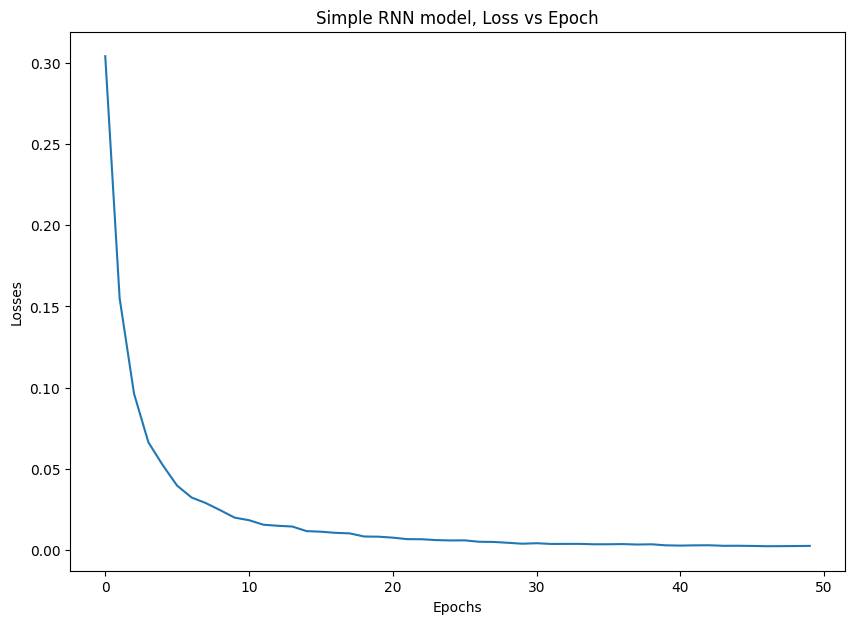

In [ ]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

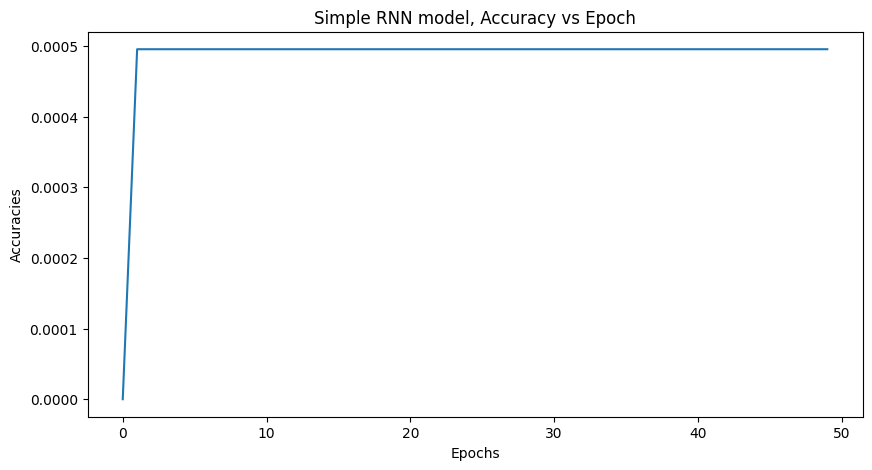

In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Model predictions for train data

In [ ]:
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

64/64 [==============================] - 1s 13ms/step


(2019, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train)
y_train.shape

(2019, 1)

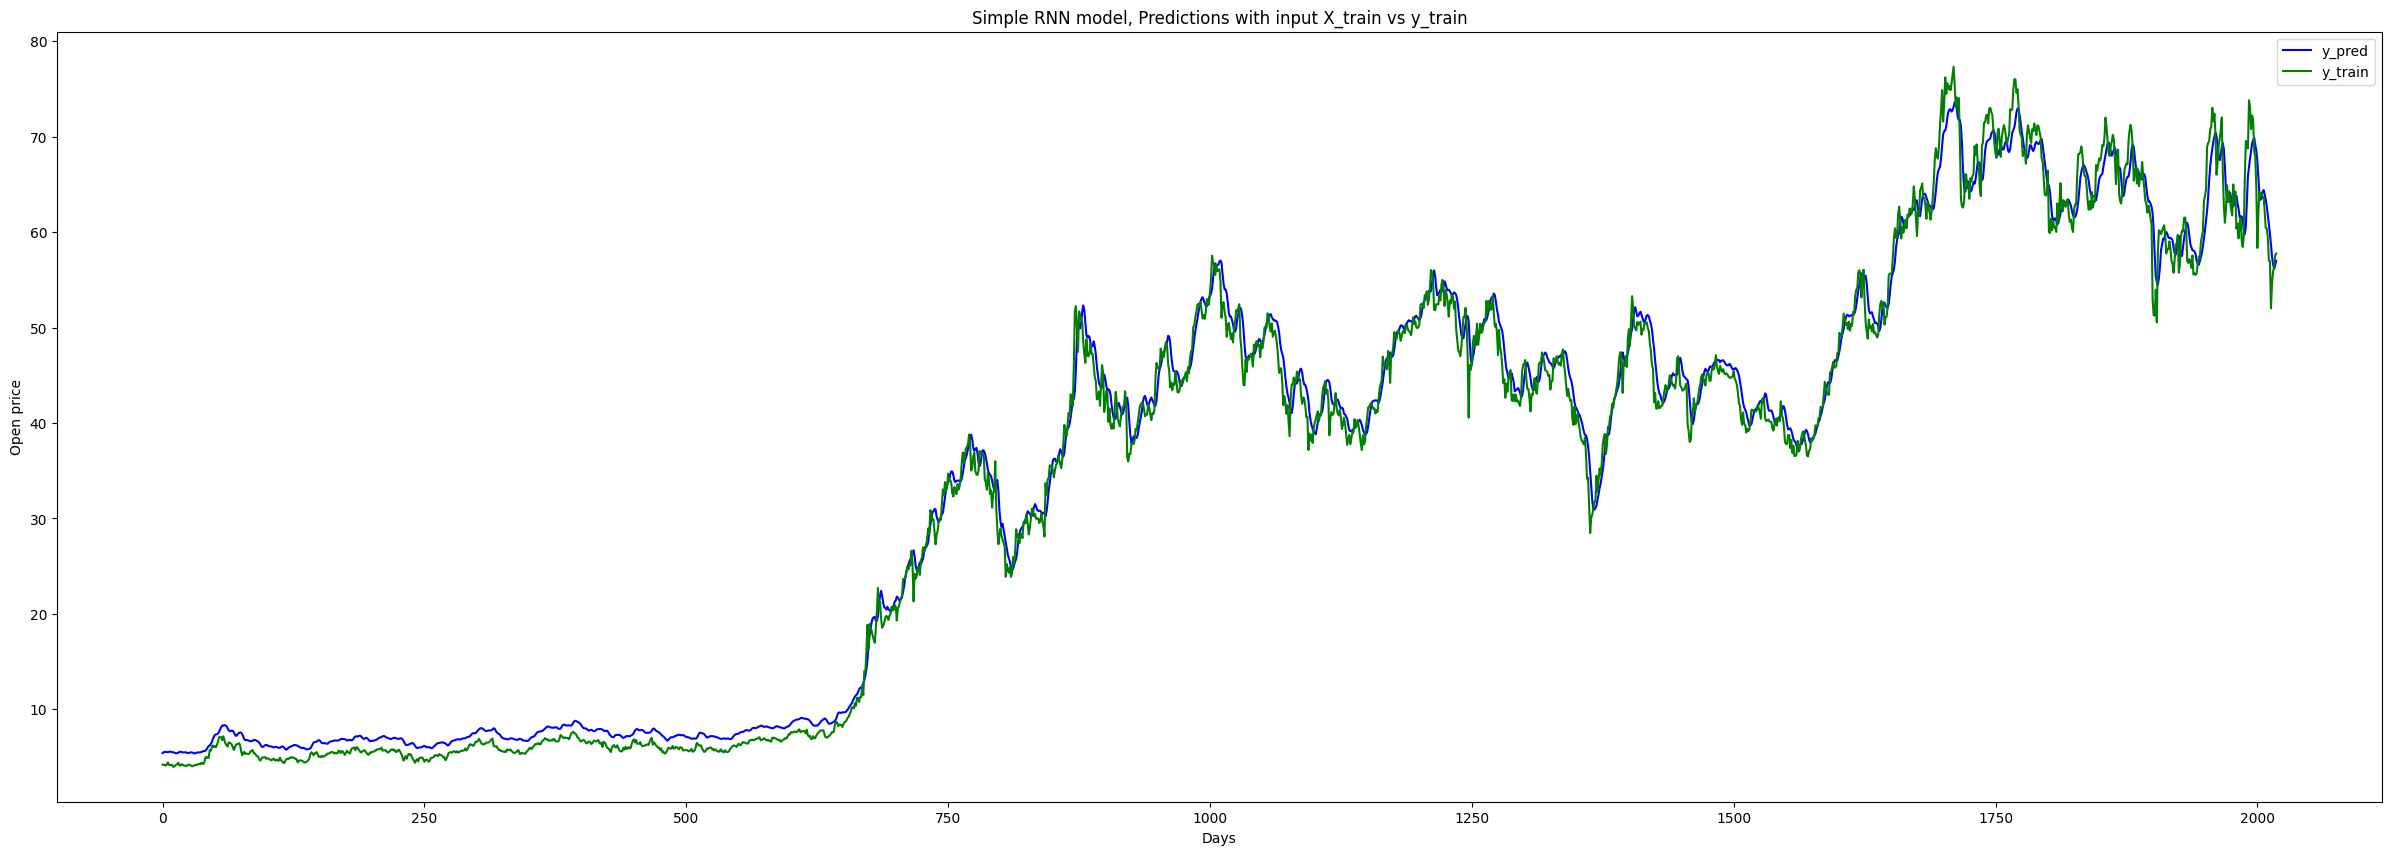

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


<a id="8"></a>
## 8.Creating Test Dataset from Validation Data

### Converting array and scaling

In [ ]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (887, 1)


### Creating X_test and y_test

In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

### Converting to array

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (837, 50)
Shape of y_test before reshape : (837,)


### Reshape

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (837, 50, 1)
Shape of y_test after reshape : (837, 1)


<a id="9"></a>
## 9.Evaluating with Validation Data

In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

27/27 [==============================] - 0s 13ms/step
Shape of y_pred_of_test : (837, 1)


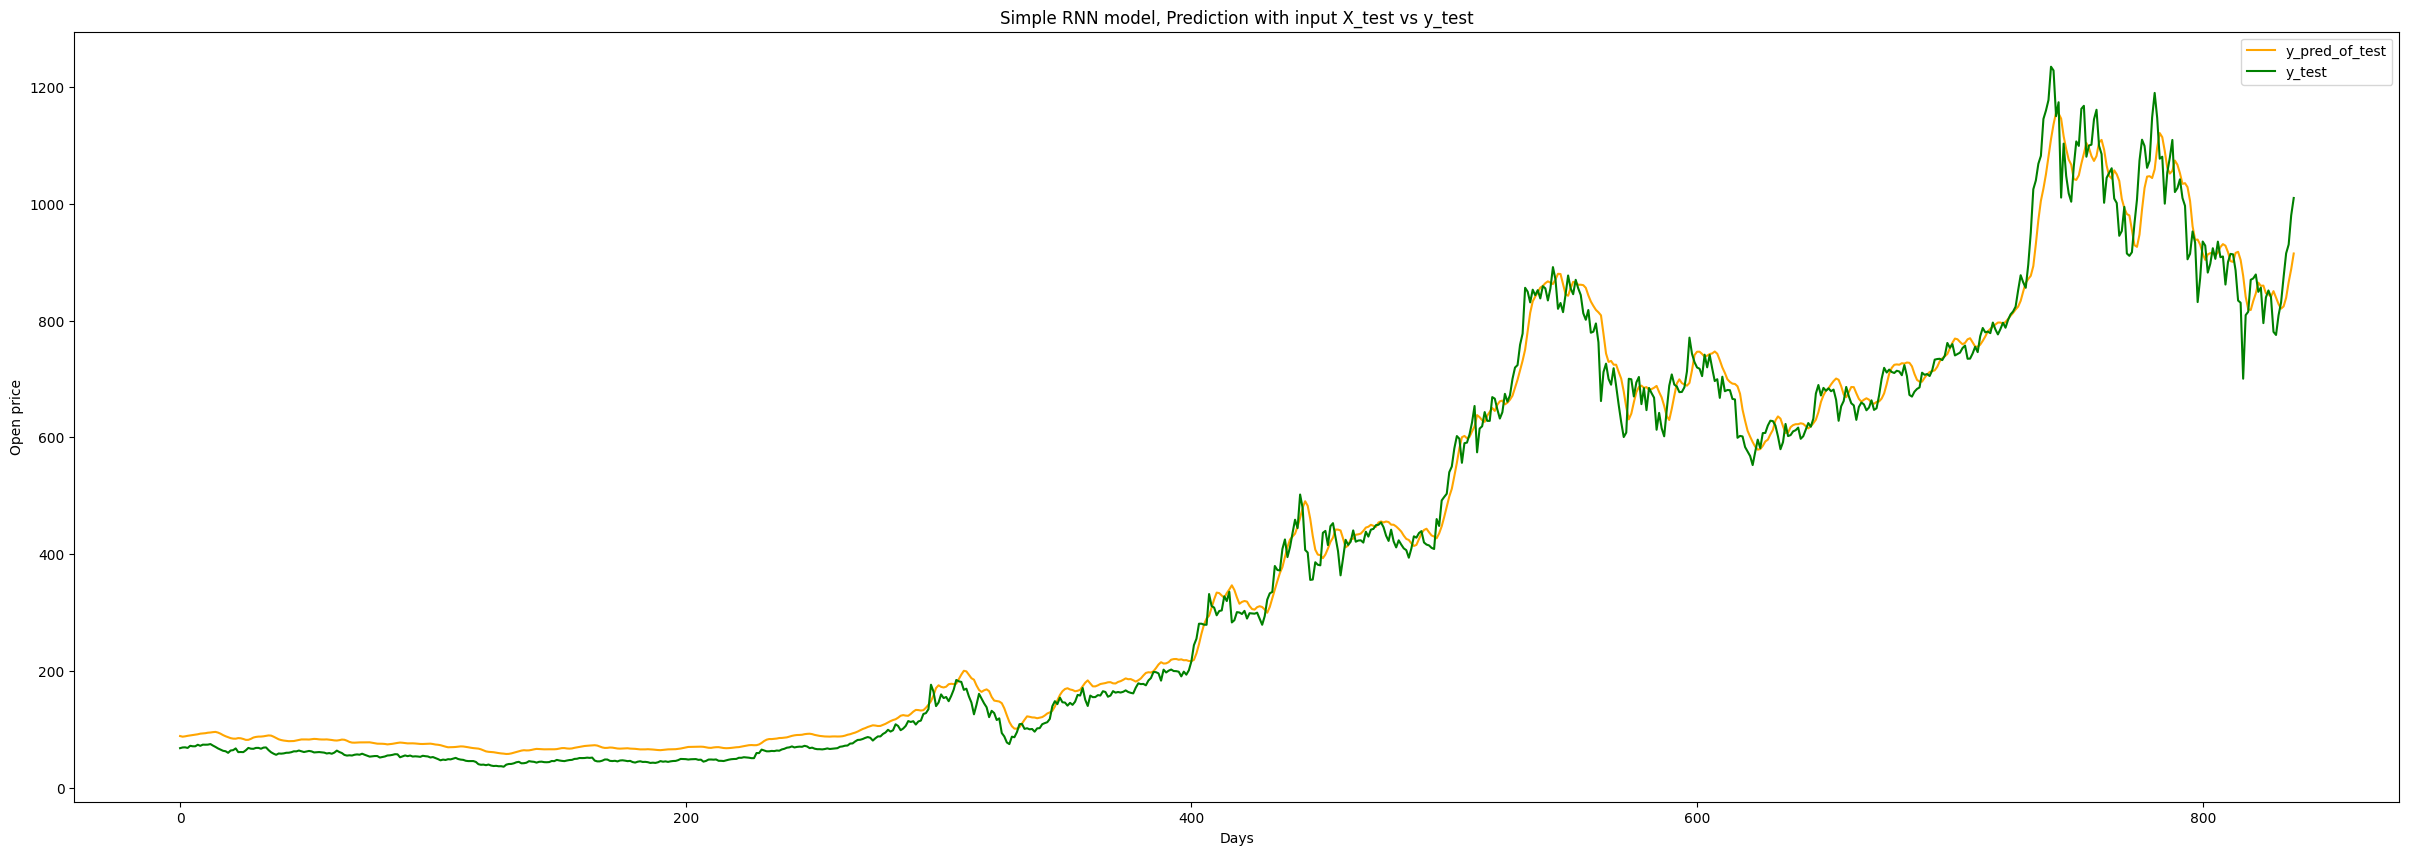

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

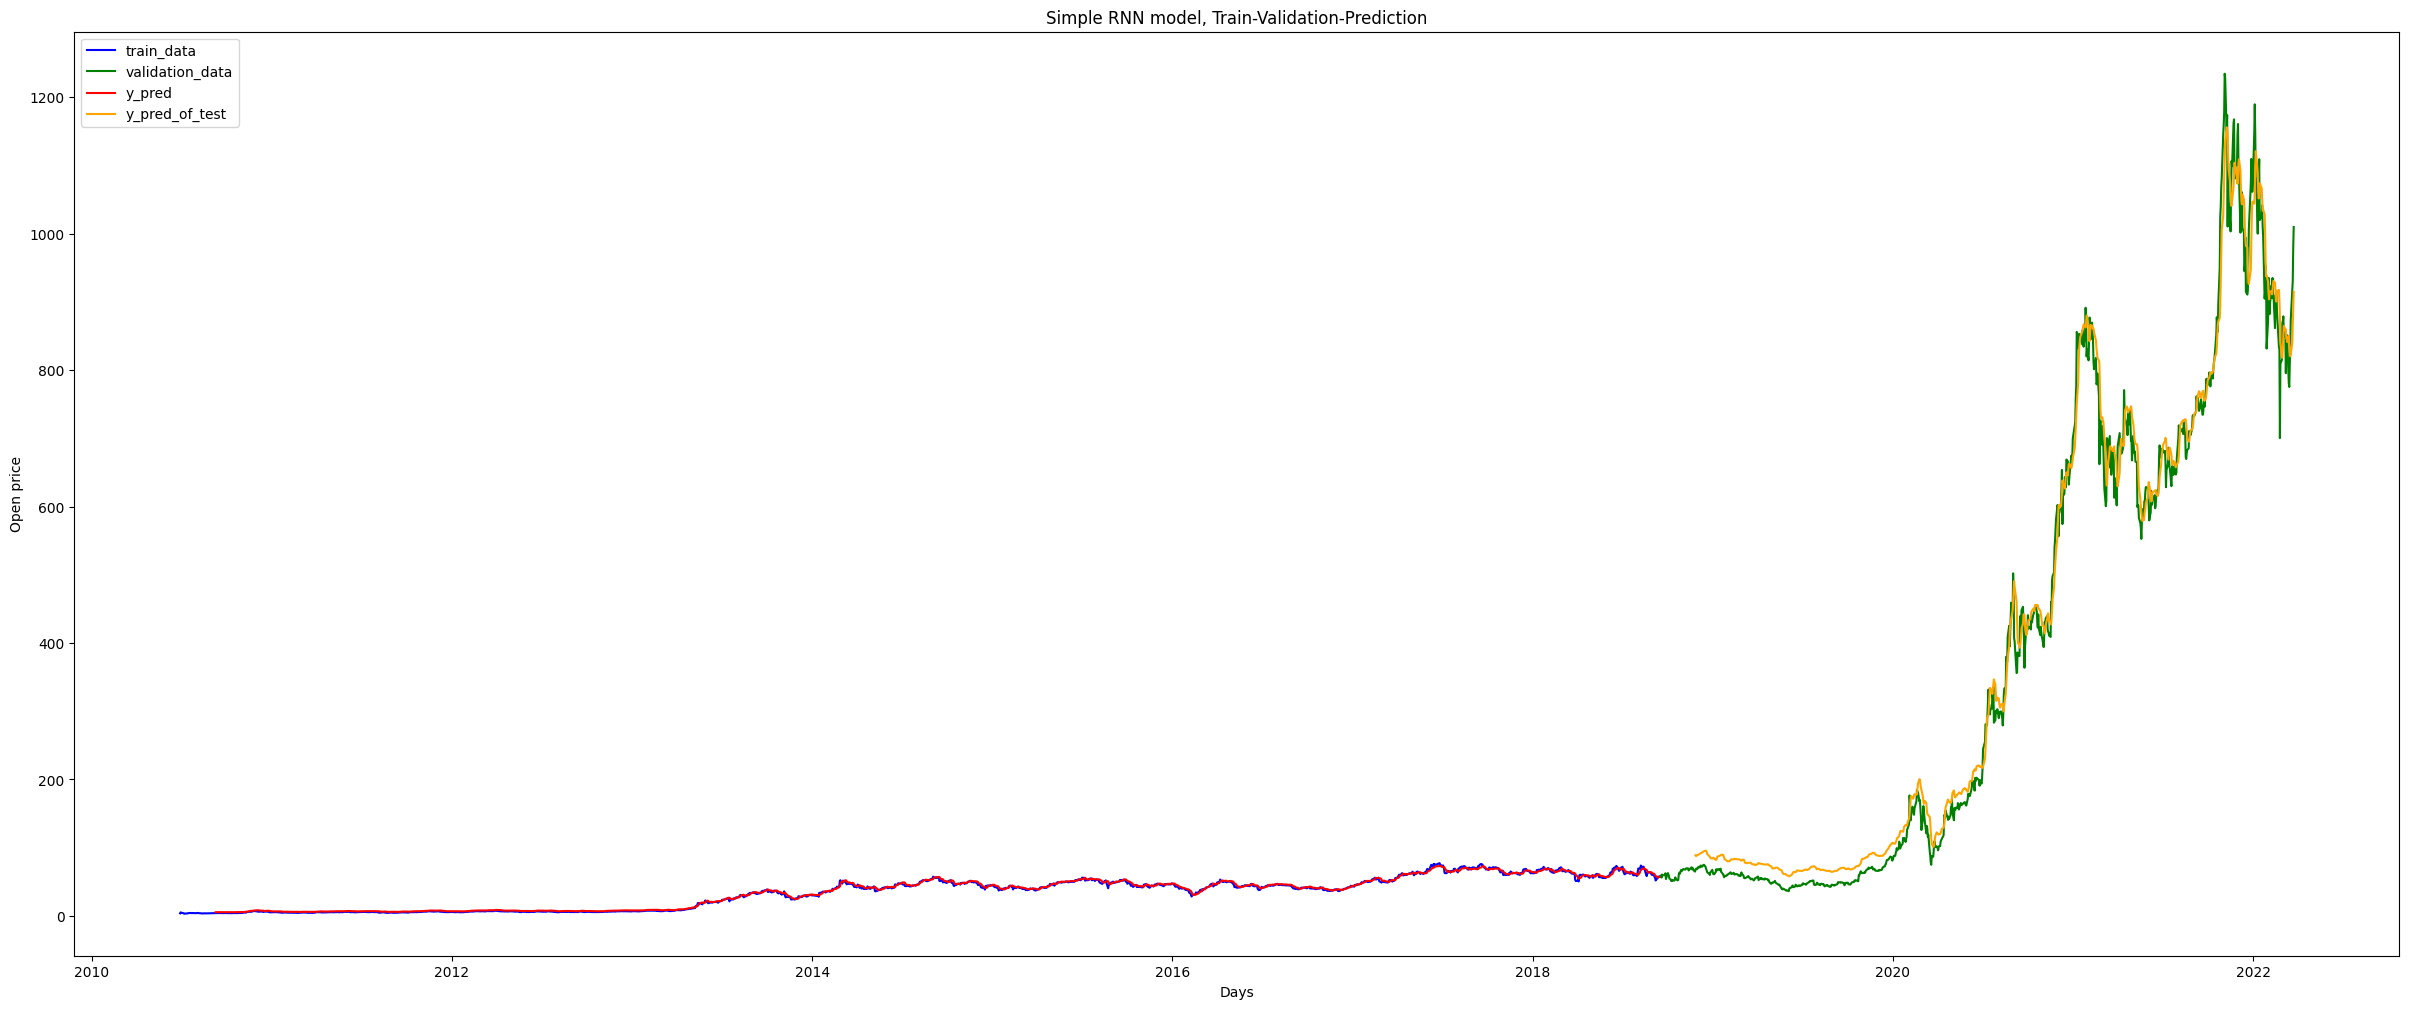

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

<a id="10"></a>
## 10.Creating LSTM Model

In [ ]:
y_train = scaler.fit_transform(y_train)

In [ ]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)


Epoch 1/10
202/202 [==============================] - 14s 44ms/step - loss: 0.0063 - accuracy: 9.9059e-04
Epoch 2/10
202/202 [==============================] - 9s 45ms/step - loss: 0.0013 - accuracy: 9.9059e-04
Epoch 3/10
202/202 [==============================] - 9s 44ms/step - loss: 0.0010 - accuracy: 9.9059e-04
Epoch 4/10
202/202 [==============================] - 8s 39ms/step - loss: 9.1053e-04 - accuracy: 9.9059e-04
Epoch 5/10
202/202 [==============================] - 9s 44ms/step - loss: 8.2416e-04 - accuracy: 9.9059e-04
Epoch 6/10
202/202 [==============================] - 9s 44ms/step - loss: 7.7218e-04 - accuracy: 9.9059e-04
Epoch 7/10
202/202 [==============================] - 8s 38ms/step - loss: 6.0177e-04 - accuracy: 9.9059e-04
Epoch 8/10
202/202 [==============================] - 9s 44ms/step - loss: 5.2792e-04 - accuracy: 9.9059e-04
Epoch 9/10
202/202 [==============================] - 9s 44ms/step - loss: 5.4745e-04 - accuracy: 9.9059e-04
Epoch 10/10
202/202 [=========

<a id="11"></a>
## 11.Evaluating LSTM Model

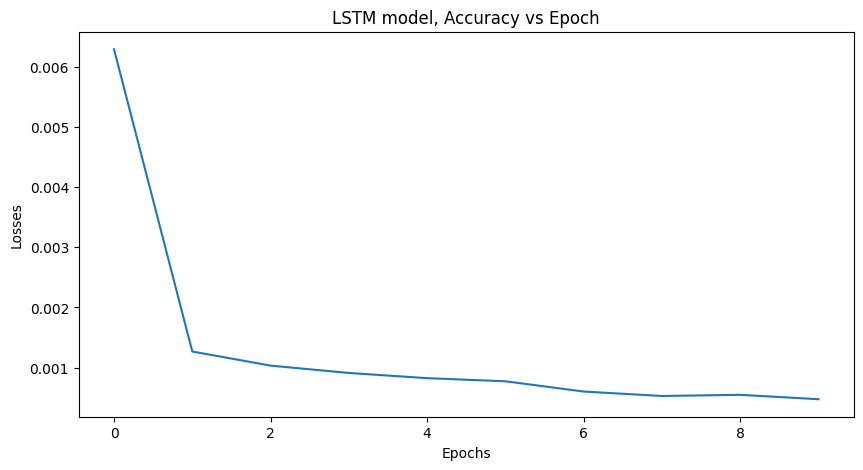

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

27/27 [==============================] - 1s 16ms/step


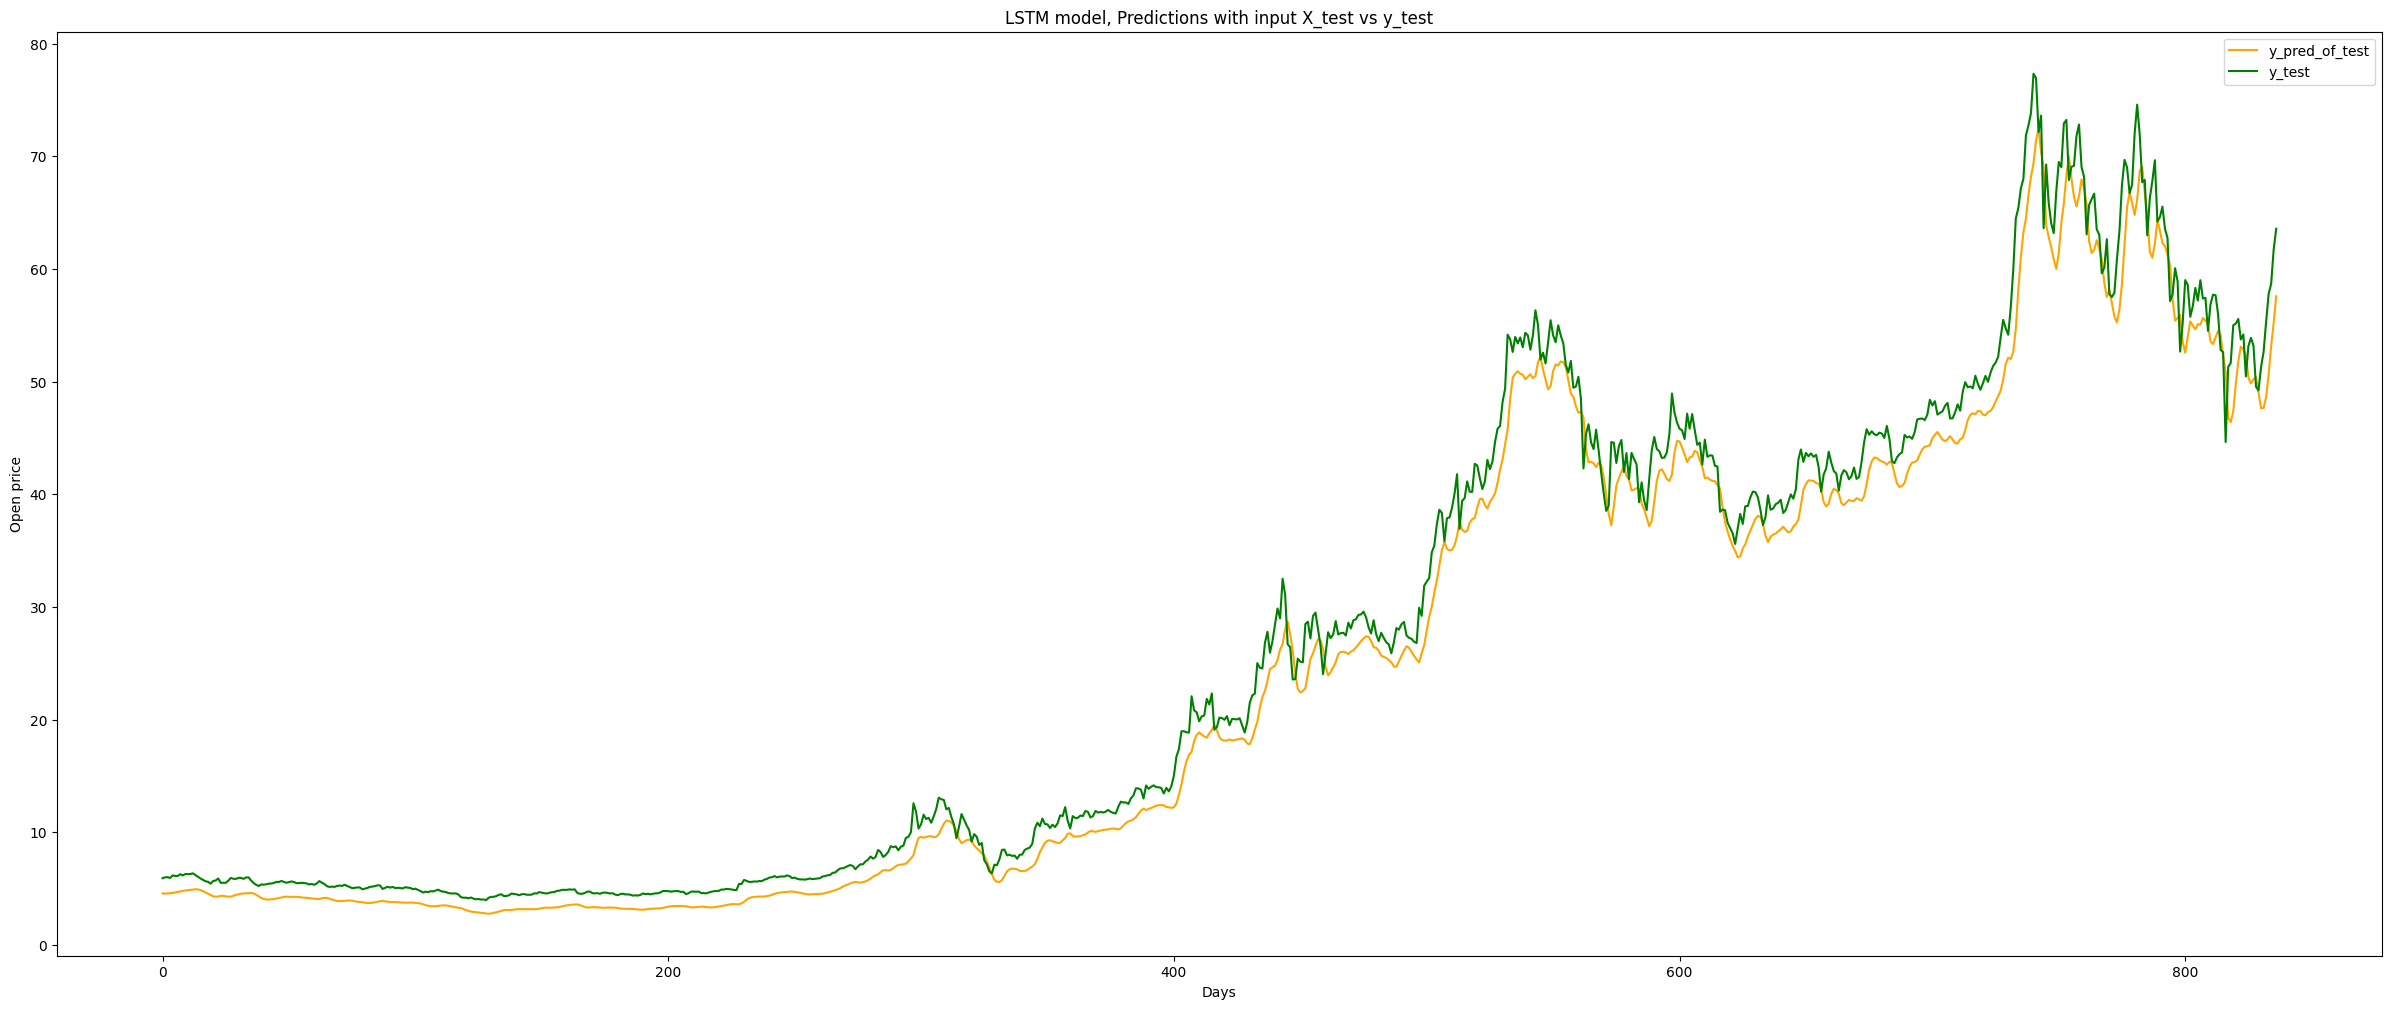

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

<a id="12"></a>
## 12.Future price prediction

* Which day is the last day in our data?

In [ ]:
data.iloc[-1]

Date          2022-03-24
Open          1009.72998
High          1024.48999
Low           988.799988
Close        1013.919983
Adj Close    1013.919983
Volume          22901900
Name: 2955, dtype: object

* We can predict the open price for the day after 3/17/2017--> for  3/18/2017.
* We will use last 50 days Open price as input of our model for this prediction
* Let us prepare it:

In [ ]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.92605468],
        [1.        ],
        [0.7817609 ],
        [0.7982285 ],
        [0.83517668],
        [0.75692478],
        [0.72416086],
        [0.50007348],
        [0.52317225],
        [0.61671729],
        [0.57005483],
        [0.32096018],
        [0.42165028],
        [0.57458169],
        [0.5573799 ],
        [0.44438195],
        [0.48162374],
        [0.54663796],
        [0.50195764],
        [0.57406779],
        [0.50890676],
        [0.51198988],
        [0.39439175],
        [0.4884262 ],
        [0.52280515],
        [0.52087215],
        [0.45416956],
        [0.32724873],
        [0.31819516],
        [0.        ],
        [0.2663208 ],
        [0.28046397],
        [0.41423609],
        [0.42023103],
        [0.4364785 ],
        [0.3638788 ],
        [0.38149652],
        [0.23279835],
        [0.3403396 ],
        [0.3696291 ],
        [0.34210145],
        [0.19629046],
        [0.18322408],
        [0.26575806],
        [0.31956542],
        [0

In [ ]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for next day      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for next day :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 46ms/step
Simple RNN, Open price prediction for next day      : 950.77106
LSTM prediction, Open price prediction for next day : 974.71295


27/27 [==============================] - 0s 15ms/step
Simple RNN RMSE: 536.1878259347512
LSTM RMSE: 14.933233793298582
27/27 [==============================] - 0s 16ms/step


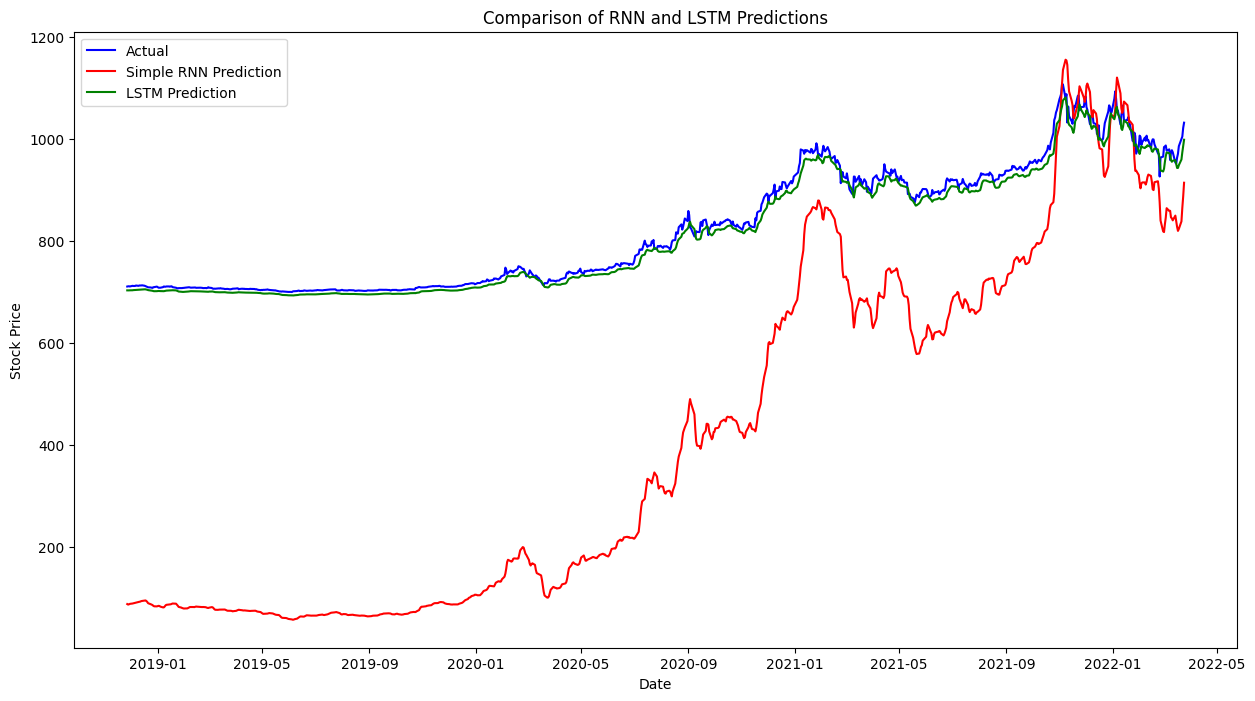

In [ ]:
# Calculate RMSE for Simple RNN model
simple_RNN_rmse = np.sqrt(np.mean((y_pred_of_test - y_test) ** 2))

# Calculate RMSE for LSTM model
LSTM_rmse = np.sqrt(np.mean((scaler.inverse_transform(model_lstm.predict(X_test)) - scaler.inverse_transform(y_test)) ** 2))

print("Simple RNN RMSE:", simple_RNN_rmse)
print("LSTM RMSE:", LSTM_rmse)

# Plotting predictions of both models along with actual values
plt.figure(figsize=(15, 8))

# Plot actual values
plt.plot(validation_data['Date'].iloc[time_step:], scaler.inverse_transform(y_test), label='Actual', color='blue')

# Plot predictions of Simple RNN
plt.plot(validation_data['Date'].iloc[time_step:], y_pred_of_test, label='Simple RNN Prediction', color='red')

# Plot predictions of LSTM
plt.plot(validation_data['Date'].iloc[time_step:], scaler.inverse_transform(model_lstm.predict(X_test)), label='LSTM Prediction', color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Comparison of RNN and LSTM Predictions')
plt.legend()
plt.show()
